In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv"
data= pd.read_csv(Url)
print(data)

         country             food_category  consumption  co2_emmission
0      Argentina                      Pork        10.51          37.20
1      Argentina                   Poultry        38.66          41.53
2      Argentina                      Beef        55.48        1712.00
3      Argentina               Lamb & Goat         1.56          54.63
4      Argentina                      Fish         4.36           6.96
...          ...                       ...          ...            ...
1425  Bangladesh        Milk - inc. cheese        21.91          31.21
1426  Bangladesh  Wheat and Wheat Products        17.47           3.33
1427  Bangladesh                      Rice       171.73         219.76
1428  Bangladesh                  Soybeans         0.61           0.27
1429  Bangladesh   Nuts inc. Peanut Butter         0.72           1.27

[1430 rows x 4 columns]


**Exploring the Dataset**

In [12]:
data.shape

(1430, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [8]:
data.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [11]:
data.nunique()

country           130
food_category      11
consumption      1113
co2_emmission    1183
dtype: int64

In [13]:
data.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

**Checking Missing and Duplicate Values**

In [21]:
data.isna().sum() #There are no missing values

country          0
food_category    0
consumption      0
co2_emmission    0
dtype: int64

In [24]:
data[data.duplicated()] #There are no duplicates

,country,food_category,consumption,co2_emmission


##Analyzing Data

**1. The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.**

In [10]:
ea_data = data[data.country.isin(['Kenya','Uganda','Rwanda','Tanzania','Burundi']) & data.food_category.isin(['Beef','Pork','Lamb & Goat','Fish', 'Eggs','Milk - inc. cheese'])]
print(ea_data)

       country       food_category  consumption  co2_emmission
902      Kenya                Pork         0.29           1.03
904      Kenya                Beef         9.54         294.38
905      Kenya         Lamb & Goat         1.86          65.14
906      Kenya                Fish         4.27           6.82
907      Kenya                Eggs         1.84           1.69
908      Kenya  Milk - inc. cheese        94.86         135.12
1089    Uganda                Pork         3.37          11.93
1091    Uganda                Beef         5.15         158.92
1092    Uganda         Lamb & Goat         1.25          43.77
1093    Uganda                Fish        12.50          19.96
1094    Uganda                Eggs         0.97           0.89
1095    Uganda  Milk - inc. cheese        37.27          53.09
1122  Tanzania                Pork         0.32           1.13
1124  Tanzania                Beef         6.09         187.92
1125  Tanzania         Lamb & Goat         1.28        

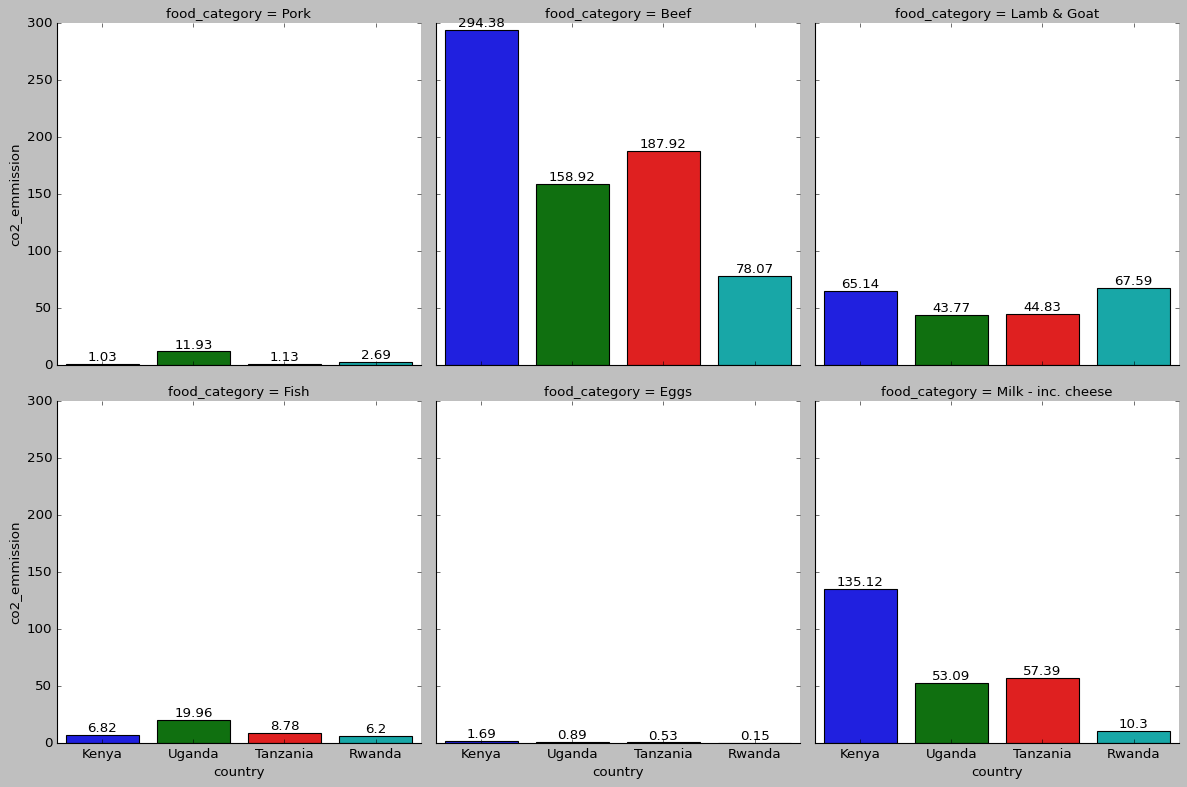

In [11]:
plt.style.use('classic')
#plt.style.use('seaborn-whitegrid')

ax = sns.catplot(x='country',y='co2_emmission',
            col='food_category',
            kind='bar',
            col_wrap = 3,
            data=ea_data)

for ax in ax.axes.ravel():
    for container in ax.containers:
        ax.bar_label(container)


**2. Highlight the marked difference between consumption and emissions in certain food product of your choice.**

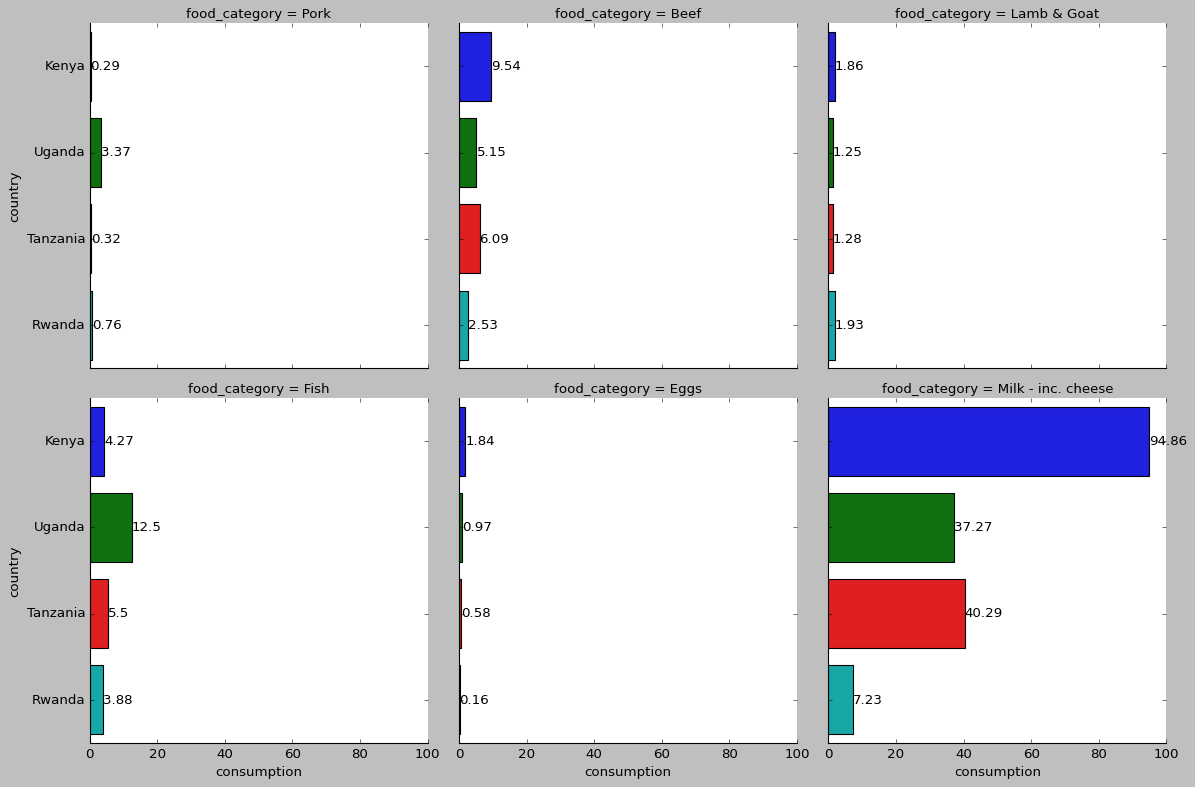

In [12]:
ax = sns.catplot(y='country',x='consumption',
            col='food_category',
            kind='bar',
            col_wrap = 3,
            orient = 'h',
            data=ea_data)

for ax in ax.axes.ravel():
    for container in ax.containers:
        ax.bar_label(container)

In [14]:
df = data.melt(id_vars=['country', 'food_category'],value_vars=['consumption','co2_emmission'])
df.head()


,country,food_category,variable,value
0,Argentina,Pork,consumption,10.51
1,Argentina,Poultry,consumption,38.66
2,Argentina,Beef,consumption,55.48
3,Argentina,Lamb & Goat,consumption,1.56
4,Argentina,Fish,consumption,4.36


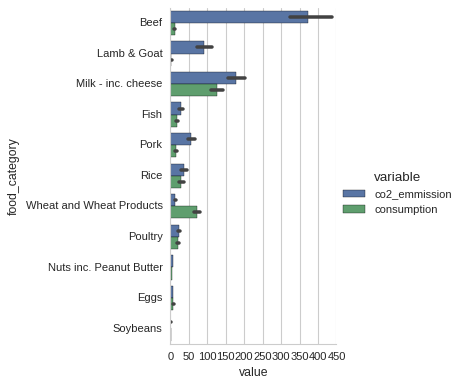

In [38]:
plt.style.use('seaborn-whitegrid')
df.sort_values(by='value',ascending = False,inplace=True)
sns.catplot(x='value',y='food_category',hue='variable',kind='bar',data=df)


**3. The food consumption of animal and non-animal products and the impact on carbon footprint**

In [55]:
carbon = data.groupby("food_category")["co2_emmission"].agg(["mean","median"])

carbon_sorted = carbon.sort_values(by=["mean","median"], ascending=[True,True])
print(carbon_sorted)

                                mean   median
food_category                                
Soybeans                    0.387308    0.035
Nuts inc. Peanut Butter     7.323000    6.185
Eggs                        7.499615    7.735
Wheat and Wheat Products   13.644462   13.240
Poultry                    22.793538   21.325
Fish                       27.601692   22.270
Rice                       37.591615   15.200
Pork                       57.070077   36.650
Lamb & Goat                91.056769   46.405
Milk - inc. cheese        179.153846  158.075
Beef                      374.102000  255.655


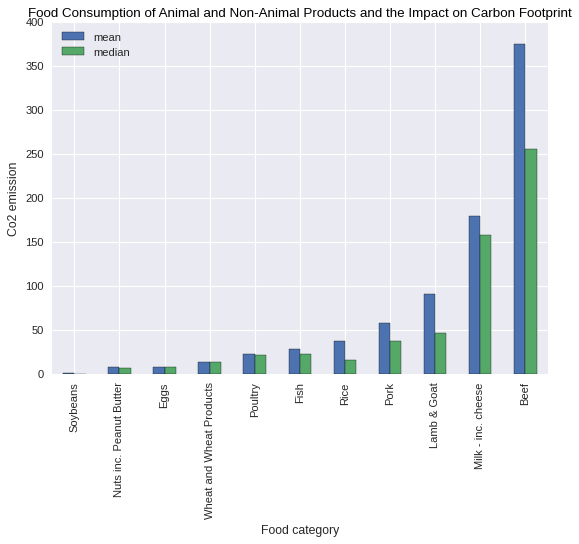

In [67]:
plt.style.use("seaborn")

carbon_sorted.plot.bar()
plt.xlabel("Food category")
plt.ylabel("Co2 emission")
plt.title("Food Consumption of Animal and Non-Animal Products and the Impact on Carbon Footprint", color="black")

plt.savefig("Food category vs Co2 emission.png")

plt.show()



**4. Beef's contribution to CO2 emissions (kg/person/year)**

In [52]:
Beef = data[data.food_category.isin(["Beef"])]
Beef

,country,food_category,consumption,co2_emmission
2,Argentina,Beef,55.48,1712.00
13,Australia,Beef,33.86,1044.85
24,Albania,Beef,22.50,694.30
35,Iceland,Beef,13.36,412.26
46,New Zealand,Beef,22.49,693.99
...,...,...,...,...
1377,Sierra Leone,Beef,1.99,61.41
1388,Sri Lanka,Beef,1.38,42.58
1399,Indonesia,Beef,2.59,79.92
1410,Liberia,Beef,0.78,24.07


In [54]:
Beef_emmission =data.groupby("food_category")["co2_emmission"].sum().loc["Beef"]
Beef_emmission

48633.26

**5. A box plot and interpretation of the CO2 contributions of food levels**

In [3]:
carbon = data.groupby("food_category")["co2_emmission"].sum()
carbon_sorted = carbon.sort_values(ascending=False)
print(carbon_sorted)

food_category
Beef                        48633.26
Milk - inc. cheese          23290.00
Lamb & Goat                 11837.38
Pork                         7419.11
Rice                         4886.91
Fish                         3588.22
Poultry                      2963.16
Wheat and Wheat Products     1773.78
Eggs                          974.95
Nuts inc. Peanut Butter       951.99
Soybeans                       50.35
Name: co2_emmission, dtype: float64


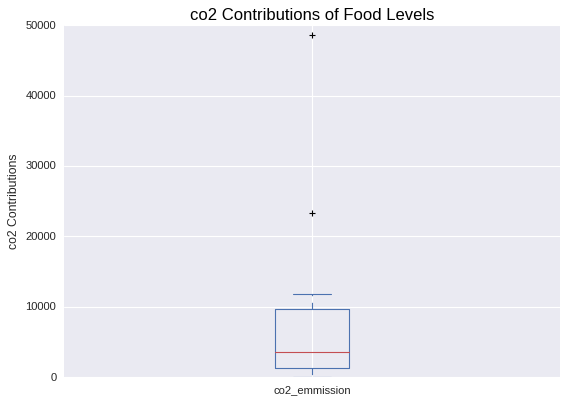

In [18]:
plt.style.use("seaborn")

carbon_sorted.plot.box(showfliers=True)
plt.ylabel("co2 Contributions")
plt.title("co2 Contributions of Food Levels", color= "black", fontsize= 15)

plt.savefig("BoxPlot.png")

plt.show()

**6. Top 10 Countries with highest emissions. Choose the appropriate visual type.**

In [19]:
emission = data.groupby("country")["co2_emmission"].sum()
highest_emission= emission.sort_values(ascending=False).head(10)
highest_emission

country
Argentina      2172.40
Australia      1938.66
Albania        1777.85
New Zealand    1750.95
Iceland        1731.36
USA            1718.86
Uruguay        1634.91
Brazil         1616.73
Luxembourg     1598.41
Kazakhstan     1575.08
Name: co2_emmission, dtype: float64

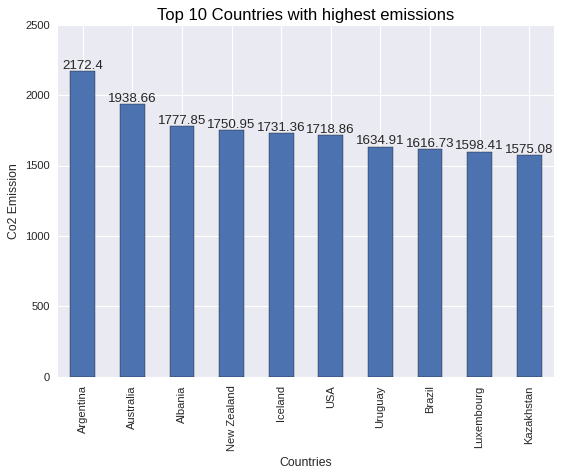

In [34]:
plt.style.use("seaborn")

ax = highest_emission[::].plot.bar()
plt.xlabel("Countries")
plt.ylabel("Co2 Emission")
plt.title("Top 10 Countries with highest emissions",color= "black", fontsize= 15)

for containter in ax.containers:
  ax.bar_label(containter)

plt.savefig("Highest emissions.png")

plt.show()